In [1]:
from matplotlib import pyplot as plt
from utils import config, sample_utils as su, parse_midas_data as pmd
from collections import defaultdict
import bz2, sys
import numpy as np
import math

In [2]:
# Load subject and sample metadata
sample_order_map = su.parse_sample_order_map()
hmp_samples = su.get_sample_names('hmp')
mother_samples = su.get_sample_names('mother')
infant_samples = su.get_sample_names('infant')

# Species list
species_list = pmd.parse_species_list()

In [3]:
# Alpha diversity at different timepoints

# Relative abundance file
relab_fpath = "%s/species/relative_abundance.txt.bz2" % (config.data_directory)
relab_file = open(relab_fpath, 'r')
decompressor = bz2.BZ2Decompressor()
raw = decompressor.decompress(relab_file.read())
data = [row.split('\t') for row in raw.split('\n')]
data.pop() # Get rid of extra element due to terminal newline
header = su.parse_merged_sample_names(data[0])

# Generate alpha diversity dictionary
alpha_div_dict = {}
for i in range(1, len(header)):
    acc = 0
    for row in data[1:]:
        rel_ab = float(row[i])
        if rel_ab != 0:
            acc += (rel_ab * math.log(rel_ab))
    alpha_div_dict[header[i]] = (acc*-1)

In [4]:
def round_down(num, divisor):
    return num - (num % divisor)

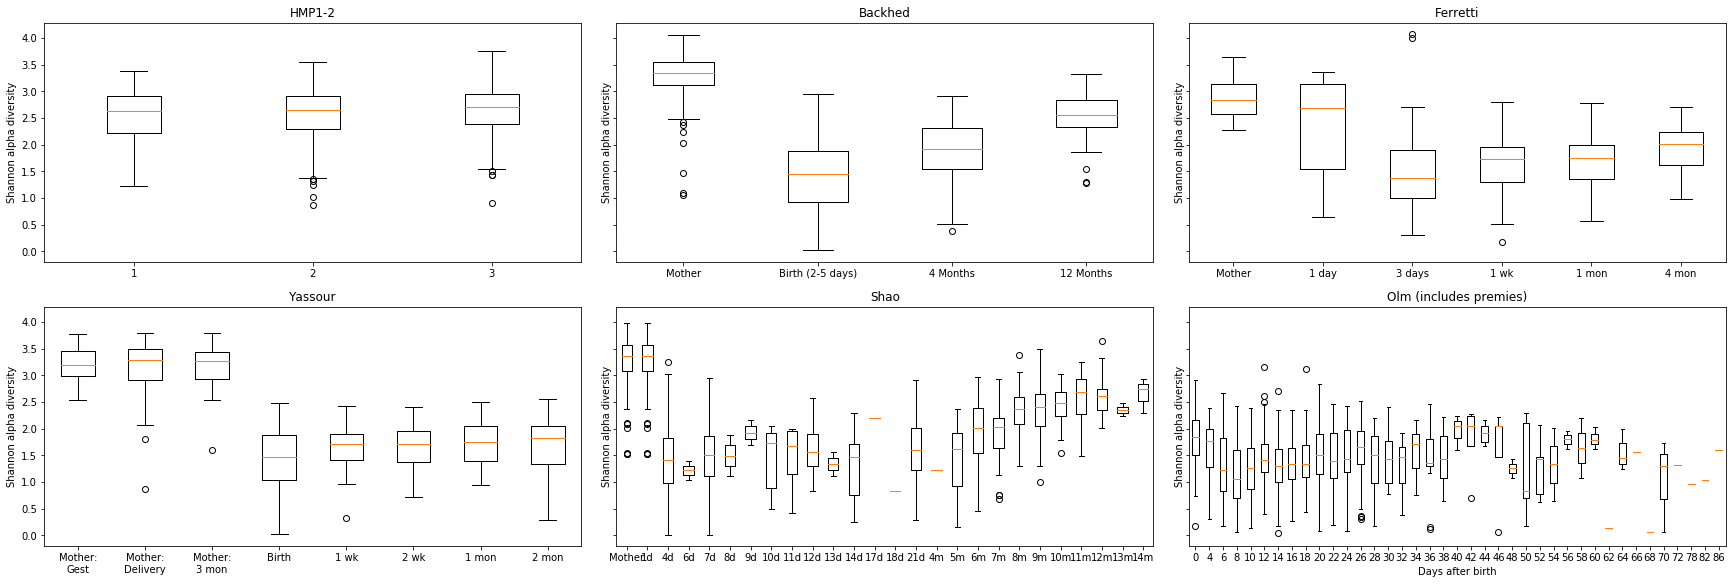

In [5]:
plt.close() # to refresh ya

# Plot alpha diversity over time for each cohort

fig, ax = plt.subplots(2,3, figsize=(24,8), sharey=True, constrained_layout=True)

# HMP1-2
hmp_samples = su.get_sample_names('HMP')
order_alpha_div_dict = defaultdict(list)
for sample in hmp_samples:
    subject, order = sample_order_map[sample]
    alpha_div = alpha_div_dict[sample]
    order_alpha_div_dict[order].append(alpha_div)

order_list = [1, 2, 3]
order_labels = ['1', '2', '3']
plot_data = [order_alpha_div_dict[o] for o in order_list]

ax[0][0].boxplot(plot_data)
ax[0][0].set_xticklabels(order_labels)
ax[0][0].set_ylabel("Shannon alpha diversity")
ax[0][0].set_title("HMP1-2")

# Backhed
backhed_samples = su.get_sample_names('Backhed')
order_alpha_div_dict = defaultdict(list)
for sample in backhed_samples:
    tp = su.sample_to_tp(sample, sample_order_map, hmp_samples, mother_samples)
    alpha_div = alpha_div_dict[sample]
    order_alpha_div_dict[tp].append(alpha_div)

order_list = ['M1', 'I1', 'I2', 'I3']
order_labels = ['Mother', 'Birth (2-5 days)', '4 Months', '12 Months']
plot_data = [order_alpha_div_dict[o] for o in order_list]

ax[0][1].boxplot(plot_data)
ax[0][1].set_xticklabels(order_labels)
ax[0][1].set_ylabel("Shannon alpha diversity")
ax[0][1].set_title("Backhed")

# Ferretti
ferretti_samples = su.get_sample_names('Ferretti')
order_alpha_div_dict = defaultdict(list)
for sample in ferretti_samples:
    tp = su.sample_to_tp(sample, sample_order_map, hmp_samples, mother_samples)
    alpha_div = alpha_div_dict[sample]
    order_alpha_div_dict[tp].append(alpha_div)

order_list = ['M1', 'I1', 'I2', 'I3', 'I4', 'I5']
order_labels = ['Mother', '1 day', '3 days', '1 wk', '1 mon', '4 mon']
plot_data = [order_alpha_div_dict[o] for o in order_list]

ax[0][2].boxplot(plot_data)
ax[0][2].set_xticklabels(order_labels)
ax[0][2].set_ylabel("Shannon alpha diversity")
ax[0][2].set_title("Ferretti")

# Yassour
yassour_samples = su.get_sample_names('Yassour')
order_alpha_div_dict = defaultdict(list)
for sample in yassour_samples:
    tp = su.sample_to_tp(sample, sample_order_map, hmp_samples, mother_samples)
    alpha_div = alpha_div_dict[sample]
    order_alpha_div_dict[tp].append(alpha_div)

order_list = ['M1', 'M2', 'M3', 'I1', 'I2', 'I3', 'I4', 'I5']
order_labels = ['Mother:\nGest', 'Mother:\nDelivery','Mother:\n3 mon', 'Birth', '1 wk', '2 wk', '1 mon', '2 mon', '3 mon']
plot_data = [order_alpha_div_dict[o] for o in order_list]

ax[1][0].boxplot(plot_data)
ax[1][0].set_xticklabels(order_labels)
ax[1][0].set_ylabel("Shannon alpha diversity")
ax[1][0].set_title("Yassour")

# Shao
month_bins = np.arange(4, 15) * 30.5
order_bins = [0, 1, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 21] + list(month_bins)

shao_samples = su.get_sample_names('Shao')
order_alpha_div_dict = defaultdict(list)
for sample in shao_samples:
    subject, order = sample_order_map[sample]
    alpha_div = alpha_div_dict[sample]
    if subject[-1] == 'M': # Mother
        order_alpha_div_dict[0].append(alpha_div)
    if order > 21: # Convert to month bins
        month_bin = round_down(order, 30.5)
        order_alpha_div_dict[month_bin].append(alpha_div)
    else:
        order_alpha_div_dict[order].append(alpha_div)

plot_data = [order_alpha_div_dict[o] for o in order_bins]
order_labels = ['Mother', '1d', '4d', '6d', '7d', '8d', '9d', '10d', '11d', '12d', '13d', '14d', '17d', '18d', '21d', '4m', '5m', '6m', '7m', '8m', '9m', '10m', '11m', '12m', '13m', '14m']

ax[1][1].boxplot(plot_data)
ax[1][1].set_xticklabels(order_labels)
ax[1][1].set_ylabel("Shannon alpha diversity")
ax[1][1].set_title("Shao")

# Olm
olm_samples = su.get_sample_names('Olm')
order_alpha_div_dict = defaultdict(list)
for sample in olm_samples:
    subject, order = sample_order_map[sample]
    alpha_div = alpha_div_dict[sample]
    order_bin = round_down(order, 2)
    order_alpha_div_dict[order_bin].append(alpha_div)

order_list = sorted(order_alpha_div_dict.keys())
plot_data = [order_alpha_div_dict[o] for o in order_list]

ax[1][2].boxplot(plot_data)
ax[1][2].set_xticklabels(order_list)
ax[1][2].set_xlabel("Days after birth")
ax[1][2].set_ylabel("Shannon alpha diversity")
ax[1][2].set_title("Olm (includes premies)")

plt.show()

In [6]:
fig.savefig('%s/alpha_diversity_by_cohort.png' % (config.analysis_directory), bbox_inches='tight')

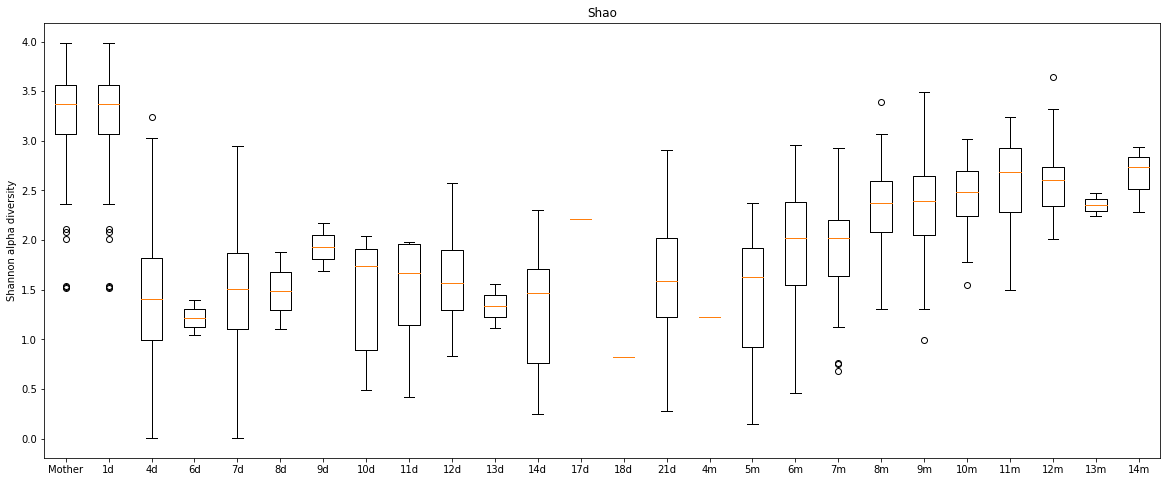

In [6]:
# Plot Shao separately
plt.close()
fig, ax = plt.subplots(figsize=(20,8))

month_bins = np.arange(4, 15) * 30.5
order_bins = [0, 1, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 21] + list(month_bins)

shao_samples = su.get_sample_names('Shao')
order_alpha_div_dict = defaultdict(list)
for sample in shao_samples:
    subject, order = sample_order_map[sample]
    alpha_div = alpha_div_dict[sample]
    if subject[-1] == 'M': # Mother
        order_alpha_div_dict[0].append(alpha_div)
    if order > 21: # Convert to month bins
        month_bin = round_down(order, 30.5)
        order_alpha_div_dict[month_bin].append(alpha_div)
    else:
        order_alpha_div_dict[order].append(alpha_div)

plot_data = [order_alpha_div_dict[o] for o in order_bins]
order_labels = ['Mother', '1d', '4d', '6d', '7d', '8d', '9d', '10d', '11d', '12d', '13d', '14d', '17d', '18d', '21d', '4m', '5m', '6m', '7m', '8m', '9m', '10m', '11m', '12m', '13m', '14m']

ax.boxplot(plot_data)
ax.set_xticklabels(order_labels)
ax.set_ylabel("Shannon alpha diversity")
ax.set_title("Shao")
plt.show()

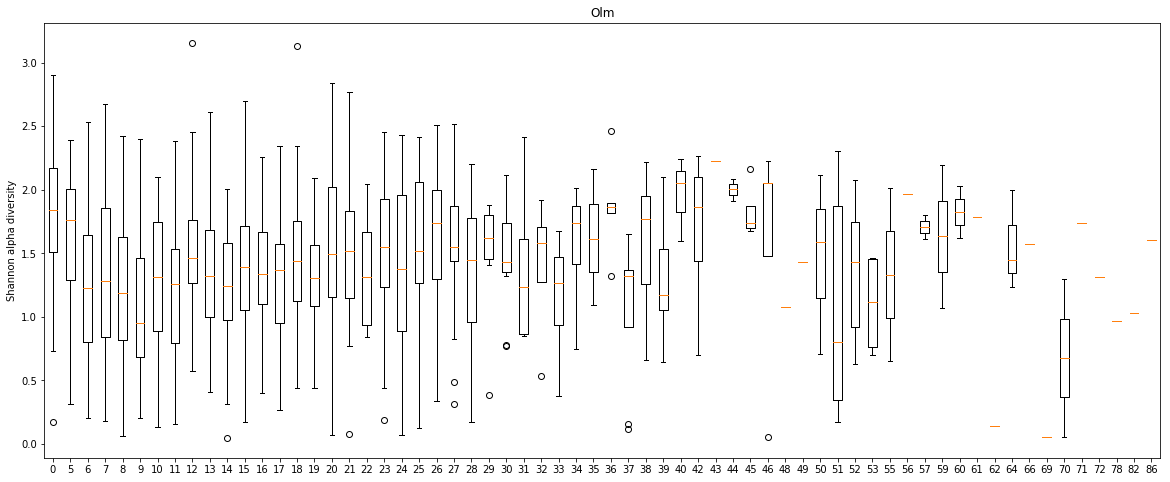

In [7]:
# Plot Olm separately

plt.close()

fig, ax = plt.subplots(figsize=(20,8))

olm_samples = su.get_sample_names('Olm')
order_alpha_div_dict = defaultdict(list)
for sample in olm_samples:
    subject, order = sample_order_map[sample]
    alpha_div = alpha_div_dict[sample]
    order_alpha_div_dict[order].append(alpha_div)

order_list = sorted(order_alpha_div_dict.keys())
plot_data = [order_alpha_div_dict[o] for o in order_list]

ax.boxplot(plot_data)
ax.set_xticklabels(order_list)
ax.set_ylabel("Shannon alpha diversity")
ax.set_title("Olm")
plt.show()

In [9]:
mi_tp_sample_dict, infant_tps_ordered = su.get_mi_tp_sample_dict(exclude_cohorts = ['olm'], binned = True)
mother_tps_ordered = sorted(mi_tp_sample_dict['mother'].keys())
tps_ordered_dict = {'mother': mother_tps_ordered, 'infant': infant_tps_ordered}

In [27]:
alpha_divs = [] # list of sample values for each tp

labels = ['M:-3m', 'M:dlv', 'M:1d', 'M:2d', 'M:3m']

for i in range(len(mother_tps_ordered)):
    tp = mother_tps_ordered[i]
    num_samples = len(mi_tp_sample_dict['mother'][tp])
    if num_samples < 10:
        continue # Skip timepoints with not enough data
    labels[i] += ("\nn=%i" % num_samples)
    alpha_divs_tp = [alpha_div_dict[sample] for sample in mi_tp_sample_dict['mother'][tp]]
    alpha_divs.append(alpha_divs_tp)

for tp in infant_tps_ordered:
    num_samples = len(mi_tp_sample_dict['infant'][tp])
    if num_samples < 10:
        continue # Skip timepoints with not enough data
    labels.append(tp + "\n" + ("n=%i" % num_samples))
    alpha_divs_tp = [alpha_div_dict[sample] for sample in mi_tp_sample_dict['infant'][tp]]
    alpha_divs.append(alpha_divs_tp)

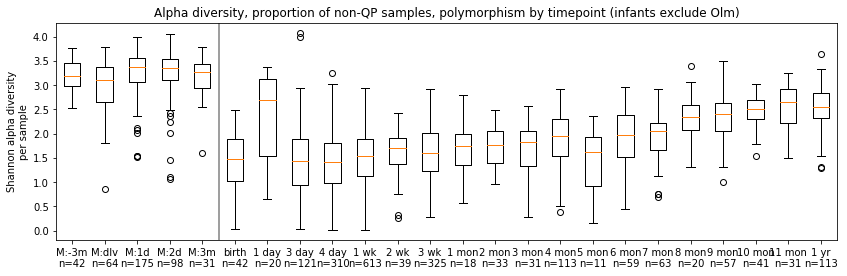

In [28]:
fig, ax = plt.subplots(figsize=(14, 4))


ax.boxplot(alpha_divs)
ax.set_ylabel("Shannon alpha diversity\nper sample")
ax.set_title("Alpha diversity, proportion of non-QP samples, polymorphism by timepoint (infants exclude Olm)")
ax.axvline(5.5, color='gray', linestyle='-')
ax.set_xticklabels(labels)

plt.show()

In [34]:
alpha_divs = [] # list of sample values for each tp
labels = []

for tp in infant_tps_ordered:
    num_samples = len(mi_tp_sample_dict['infant'][tp])
    if num_samples < 10:
        continue # Skip timepoints with not enough data
    labels.append(tp + "\n" + ("n=%i" % num_samples))
    alpha_divs_tp = [alpha_div_dict[sample] for sample in mi_tp_sample_dict['infant'][tp]]
    alpha_divs.append(alpha_divs_tp)


alpha_divs_mother_combined = []
for i in range(len(mother_tps_ordered)):
    tp = mother_tps_ordered[i]
    num_samples = len(mi_tp_sample_dict['mother'][tp])
    alpha_divs_tp = [alpha_div_dict[sample] for sample in mi_tp_sample_dict['mother'][tp]]
    alpha_divs_mother_combined += alpha_divs_tp

alpha_divs.append(alpha_divs_mother_combined)
labels.append('Mother'+ "\n" + ("n=%i" % len(alpha_divs_mother_combined)))

alpha_divs_hmp = [alpha_div_dict[sample] for sample in hmp_samples]
alpha_divs.append(alpha_divs_hmp)
labels.append('Adult' + "\n" + ("n=%i" % len(alpha_divs_hmp)))

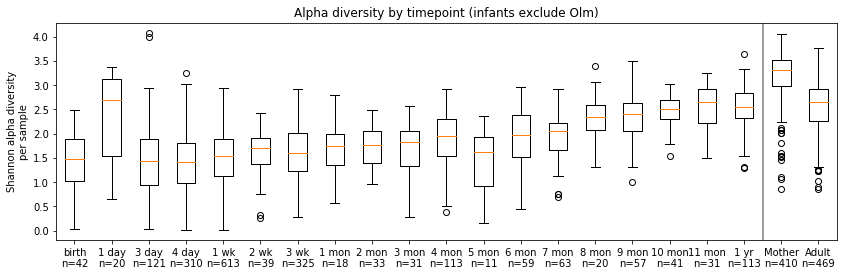

In [35]:
fig, ax = plt.subplots(figsize=(14, 4))


ax.boxplot(alpha_divs)
ax.set_ylabel("Shannon alpha diversity\nper sample")
ax.set_title("Alpha diversity by timepoint (infants exclude Olm)")
ax.axvline(19.5, color='gray', linestyle='-')
ax.set_xticklabels(labels)

plt.show()

In [6]:
# Now try combining all healthy infant cohorts (Backhed, Ferretti, Yassour, Shao)
tp_dict = su.get_mi_tp_sample_dict(exclude_cohorts = ['ferretti'])

In [7]:
all_days = sorted(tp_dict['infant'].keys())
all_alpha_divs = []

for day in all_days:
    samples = tp_dict['infant'][day]
    alpha_divs = [alpha_div_dict[sample] for sample in samples]
    all_alpha_divs.append(alpha_divs)

ax.boxplot(all_alpha_divs)
ax.set_xticklabels(all_days)
ax.set_ylabel("Shannon alpha diversity")
ax.set_title("Olm")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'boxplot'